In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression

In [30]:
X, y = make_regression(n_features=1, noise = 30, random_state=42)
# noise mówi jak duży szum do generowanego zbioru można wprowadzić (więcej w dokumentacji)

In [31]:
X.shape, y.shape
# wymiarowość jest ważna i naeży o niej pamiętać
# X ma być macierzą 2wymiarową

((100, 1), (100,))

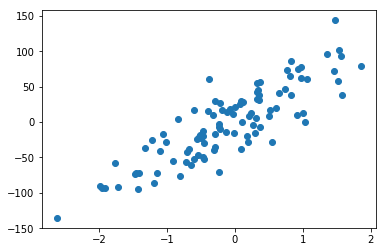

In [32]:
plt.scatter(np.squeeze(X), y) 
# sqeez pomija wszystkie wymiary które nic nie wnoszą
# matplotlib dostosowyje skalę wykresy żeby wszystkie dane na nim się znalazły

In [33]:
from sklearn.linear_model import LinearRegression

In [57]:
regressor = LinearRegression(fit_intercept=False)

In [58]:
regressor.fit(X, y)
# fit wymaga podania przyanjmniej X (zmiennych objaśniających), i zależnie od typu nadzorowania też y

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [59]:
regressor.coef_, regressor.intercept_
# coef_ współczynnik nachylenia prostej która się dopasowała (1 bo to funkcja 1 zmiennej)
# próba wydobycia atrybutów które się do procesu dopasowały

(array([49.39056071]), 0.0)

In [45]:
# użyjemy predykcji 
domain = np.linspace(-3, 2)[:, None]
# trzeba zamienić to da 2D array żeby przeprowadzić predykcję za pomocą .reshape(-1, 1)
# lub za pomocą indeksacji i sliceów
# np.newaxis = None (w slice = włóż tutaj nową oś)
domain.round(2)[:5]

array([[-3.  ],
       [-2.9 ],
       [-2.8 ],
       [-2.69],
       [-2.59]])

In [48]:
#prognozowanie
pred = regressor.predict(domain)

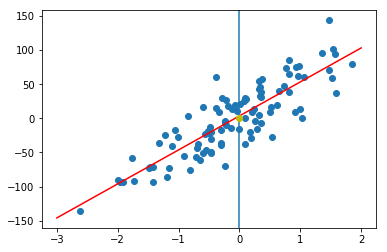

In [60]:
#plt.figure(figsize(12,6))
plt.scatter(X,y)
plt.plot(domain, pred, c='r')
plt.axvline(0)
plt.scatter(0, regressor.intercept_, c='y', zorder= 100)
# zorder jak wysoko znajdzie się punkt na wykresie
# kropki na samym dole później linie i najwyżej teksty

In [61]:
##################################################################################

In [62]:
from sklearn.datasets import load_iris

In [63]:
iris = load_iris()

In [66]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [67]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [68]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [69]:
X, y = load_iris(return_X_y=True)
# funkcja zwraca krotkę 2 tablic numpy

In [70]:
X.shape, y.shape

((150, 4), (150,))

In [71]:
import pandas as pd

In [75]:
df = pd.DataFrame(X, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


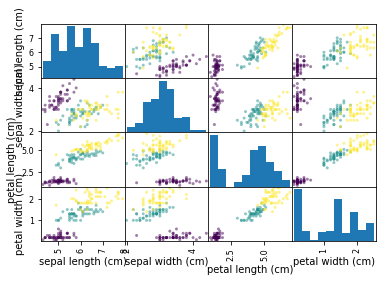

In [78]:
pd.plotting.scatter_matrix(df, c =y);

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
classifier = KNeighborsClassifier()

In [81]:
classifier.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [84]:
X_new = np.array([[5,3,2,1]])
y_new = classifier.predict(X_new)
iris.target_names[y_new]

array(['setosa'], dtype='<U10')

In [85]:
np.argmax(y_new)

0

In [88]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [117]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [118]:
X_train[:5]

array([[6.3, 2.3, 4.4, 1.3],
       [5. , 3.6, 1.4, 0.2],
       [5. , 2. , 3.5, 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [6.2, 2.2, 4.5, 1.5]])

In [119]:
y_train.shape, y_test.shape

((105,), (45,))

In [120]:
# oceniamy teraz czy to w ogóle sensownie klasyfikuje
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [121]:
y_pred = classifier.predict(X_test)

In [122]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True])

In [124]:
classifier.score(X_test, y_test)

0.9111111111111111

In [126]:
def complexity_score (X, y, n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    classifier = KNeighborsClassifier(n_neighbors=n)
    classifier.fit(X_train, y_train)
    return classifier.score(X_test, y_test)

In [132]:
complexity_score(X, y, 30)

1.0

In [137]:
scores = [
    np.array([complexity_score(X, y, n) for _ in range(200)]).mean()
    for n in range(1, 30)
]

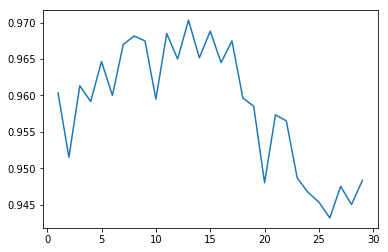

In [138]:
plt.plot(range(1,30), scores)

In [139]:
np.argmax(scores)

12

In [140]:
############################################################

In [141]:
from sklearn.datasets import load_breast_cancer

In [142]:
# kroswalidacja
data = load_breast_cancer()
X,y = load_breast_cancer(return_X_y=True)

In [143]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [144]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [145]:
data.target_names[y][:40]

array(['malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'benign', 'malignant', 'malignant'],
      dtype='<U9')

In [146]:
from sklearn.decomposition import PCA

In [148]:
pca = PCA(n_components=2)
# rzytujemy 30 wymiarową przestrzeń na 2 wymiarową
pca.fit(X)
# tylko X bo unsupervized 

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [150]:
X.shape, pca.transform(X).T.shape
# transponujemy 

((569, 30), (2, 569))

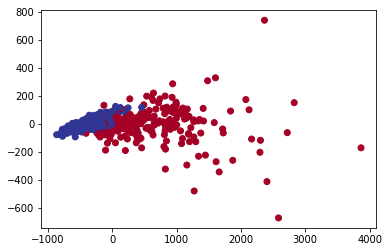

In [153]:
plt.scatter(*pca.transform(X).T,c=y, cmap='RdYlBu')
# niebieskie łagodny, a czerwony złośliwy
# nie ma pewności że pca dobrze zrzutuje wymiary, ale w tym wypadku to akurat sensownie wyszło

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
# wybiera się kilka modeli (Random forest) żeby uzyskać średnio dobry i wartościowy wynik niż gdyby przyjąć jeden model

In [163]:
forest = RandomForestClassifier(n_estimators=30)
# podajemy w nawiasie "ilość drzew w lesie" czyli setymatorów

In [164]:
# przygotowujemy dane do szkolenia modelu i testowania

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [166]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [167]:
y_pred = forest.predict(X_test)

In [168]:
from sklearn.metrics import confusion_matrix

In [169]:
confusion_matrix(y_test, y_pred)

array([[ 51,   5],
       [  7, 108]], dtype=int64)

In [170]:
# złośliwy, łagodny
# ground truth, predictions

In [171]:
from sklearn.metrics import classification_report

In [173]:
print(classification_report(y_test, y_pred, target_names=data.target_names))
# to samo co w confusion_matrix ale wzbogacone w precysion i recall
# racall ile z pośród danych które powinnybyć dostarczone zostało dostarczone
# support to liczba przypadków która należy do klasy
# f1-score średnia harmoniczna dla recall i precysion żeby łatwiej było określić trafność ???? chyba ;P

              precision    recall  f1-score   support

   malignant       0.88      0.91      0.89        56
      benign       0.96      0.94      0.95       115

   micro avg       0.93      0.93      0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [174]:
from sklearn.metrics import f1_score

In [175]:
f1_score(y_test, y_pred)

0.9473684210526316

In [176]:
# kroswalidacja to powtarzający się proces podzielenia zbiorów tak żeby wszystkie przypadki trafiły do zbioru testowego
# unika to "szczęśliwego" przypadkowegopodziału

In [185]:
from sklearn.model_selection import cross_val_score, KFold
# KFold spliter dzielący zbiór na K sposobów
from sklearn.model_selection import StratifiedKFold

In [188]:
fold = KFold(n_splits=100)
s_fold =StratifiedKFold(n_splits=100)

In [189]:
cross_val_score(forest, X, y, scoring='f1', cv=s_fold).mean()
# cv -> cross validation
# najprościej z tego co wyszło policzyć średnią żeby z tablicy wyciągnąć średni score

0.9714047619047619

In [190]:
##################################################

In [191]:
from sklearn.datasets import fetch_covtype

In [192]:
X, y = fetch_covtype(return_X_y=True)

In [193]:
X.shape

(581012, 54)

In [194]:
y

array([5, 5, 2, ..., 3, 3, 3])

In [196]:
data = fetch_covtype()

In [197]:
X, y = data.data, data.target

In [198]:
from sklearn.model_selection import GridSearchCV

In [202]:
# musimy określić jakie parametry chcemy sprawdzić, robimy to za pomocą słownika
# więcej w dokumentacji
params_grid = {
    'n_estimators': [2, 10],
    'max_depth' : [5, None],     # None to maksymalna głębokość
    'min_samples_leaf' : [2, 8]
}
# mamy wytyczoną 3D kostkę
s_fold = StratifiedKFold(n_splits=5)
# grud zachowuje się jak estymator
grid = GridSearchCV(forest, params_grid, scoring='accuracy', cv=s_fold, verbose=2)
# verbose sprawi że dostaniemy więcej informacji

In [203]:
grid.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=5, min_samples_leaf=2, n_estimators=2 .................
[CV] .. max_depth=5, min_samples_leaf=2, n_estimators=2, total=   1.7s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=2 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] .. max_depth=5, min_samples_leaf=2, n_estimators=2, total=   1.6s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=2 .................
[CV] .. max_depth=5, min_samples_leaf=2, n_estimators=2, total=   1.9s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=2 .................
[CV] .. max_depth=5, min_samples_leaf=2, n_estimators=2, total=   1.7s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=2 .................
[CV] .. max_depth=5, min_samples_leaf=2, n_estimators=2, total=   1.9s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=10 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=10, total=   6.5s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=10 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=10, total=   6.8s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=10 ................
[CV] . max_depth=5, min_samples_leaf=2, n_estimators=10, total=   6.5s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=10 ................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  6.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [2, 10], 'max_depth': [5, None], 'min_samples_leaf': [2, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [204]:
grid.cv_results_

C:\Users\Bartosz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Bartosz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Bartosz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Bartosz\Anaconda3\lib\site-packages\skle

{'mean_fit_time': array([ 1.74671206,  6.59829021,  1.6279717 ,  6.53643208,  4.40201192,
        19.82890244,  4.31698484, 18.5879529 ]),
 'std_fit_time': array([0.13675522, 0.25302993, 0.12188577, 0.09854649, 0.08446116,
        0.47510295, 0.30107979, 0.52768048]),
 'mean_score_time': array([0.10941434, 0.29749055, 0.0987577 , 0.27970214, 0.16217594,
        0.59780464, 0.15829043, 0.55126801]),
 'std_score_time': array([0.01602928, 0.02539964, 0.00316118, 0.00551848, 0.00852294,
        0.03697982, 0.00852574, 0.03801772]),
 'param_max_depth': masked_array(data=[5, 5, 5, 5, None, None, None, None],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[2, 2, 8, 8, 2, 2, 8, 8],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[2, 10, 2, 10, 2, 10

In [208]:
df = pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')
columns = [f'param_{key}' for key in params_grid]
df[[*columns, 'mean_test_score']]
#indeksowanie w dataframe idzie po kolumnach

C:\Users\Bartosz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Bartosz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Bartosz\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Bartosz\Anaconda3\lib\site-packages\skle

,param_n_estimators,param_max_depth,param_min_samples_leaf,mean_test_score
3,10,5,8,0.638536
1,10,5,2,0.634804
2,2,5,8,0.616899
0,2,5,2,0.599406
5,10,None,2,0.573203
7,10,None,8,0.571437
4,2,None,2,0.558192
6,2,None,8,0.536419


In [209]:
# dzięki pipelineom można znaleźć najlepszą kombinację estymatorów

In [210]:
from sklearn.pipeline import Pipeline

In [212]:
steps = [
    ('PCA', pca),             # pierwszy etap
    ('RandomForest', forest)  # drugi etap    
]
pipeline = Pipeline(steps, memory='temp')

In [213]:
from sklearn.model_selection import RandomizedSearchCV

In [215]:
from scipy.stats import randint
# randint przystosowany do pracy z randomized search

In [216]:
params_grid = {
    'PCA__n_components' : randint(2, 30),
    'RandomForest__n_estimators' : randint(2, 10),
    'RandomForest__max_depth' : randint(5, 10),
    'RandomForest__min_samples_leaf' : randint(2, 10)
}
# mamy wytyczoną 3D kostkę
s_fold = StratifiedKFold(n_splits=5)

search = RandomizedSearchCV(pipeline, params_grid, scoring='accuracy', cv=s_fold,
                            verbose=1, n_iter=4, return_train_score=False)
# n_iter mówi ile iteracj będzie wykonanych


In [217]:
search.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Bartosz\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 0.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
C:\Users\Bartosz\Anaconda3\lib\site-packages\sklearn\pipeline.py:230: UserWarning: Persisting input arguments took 0.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 e

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
          error_score='raise-deprecating',
          estimator=Pipeline(memory='temp',
     steps=[('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('RandomForest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
   ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
          fit_params=None, iid='warn', n_iter=4, n_jobs=None,
          param_distributions={'PCA__n_components': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C300CD80F0>, 'RandomForest__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C300CD8D30>, 'RandomForest__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C305927EB8>, 'RandomForest__min

In [218]:
search.best_score_

0.603793036976861

In [219]:
search.best_estimator_

Pipeline(memory='temp',
     steps=[('PCA', PCA(copy=True, iterated_power='auto', n_components=27, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('RandomForest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
     ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [224]:
search.best_estimator_.steps[0][1].get_params()
#lista najlepszych parametrów

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 27,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}